<a href="https://colab.research.google.com/github/mcleantom/makemore_from_scratch/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://databookuw.com/DATA_PYTHON.zip
!unzip DATA_PYTHnON.zip -d DATA_PYTHON

--2023-03-22 22:23:06--  http://databookuw.com/DATA_PYTHON.zip
Resolving databookuw.com (databookuw.com)... 192.124.249.102
Connecting to databookuw.com (databookuw.com)|192.124.249.102|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181100806 (173M) [application/zip]
Saving to: ‘DATA_PYTHON.zip.1’

DATA_PYTHON.zip.1   100%[===================>] 172.71M  55.2MB/s    in 3.8s    

2023-03-22 22:23:10 (45.7 MB/s) - ‘DATA_PYTHON.zip.1’ saved [181100806/181100806]

Archive:  DATA_PYTHON.zip
replace DATA_PYTHON/DATA/VORTALL.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 10})

mat_contents = scipy.io.loadmat(os.path.join('DATA_PYTHON', 'DATA', 'allFaces.mat'))

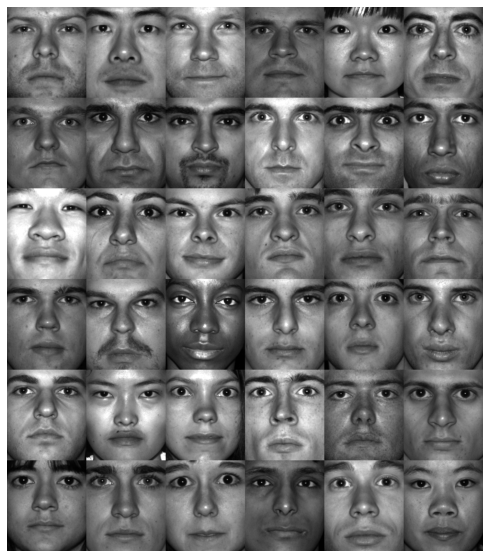

In [6]:
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

allPersons = np.zeros((n*6, m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m: (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

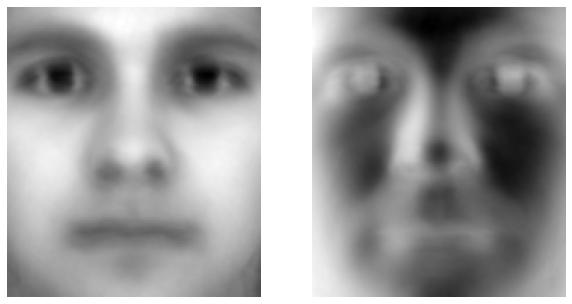

In [10]:
# use the first 36 people as training data
trainingFaces = faces[:, :np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces, axis=1)

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X, full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

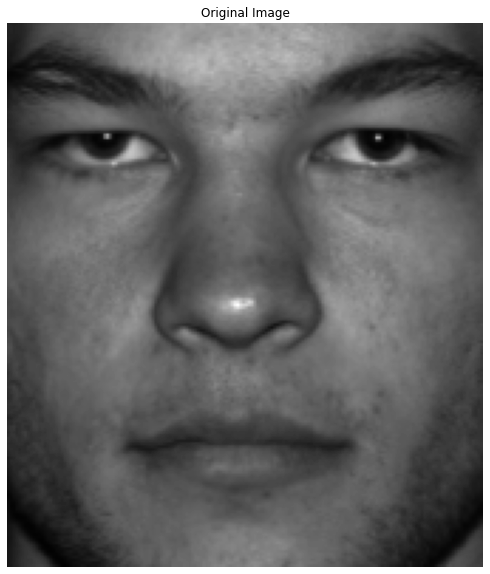

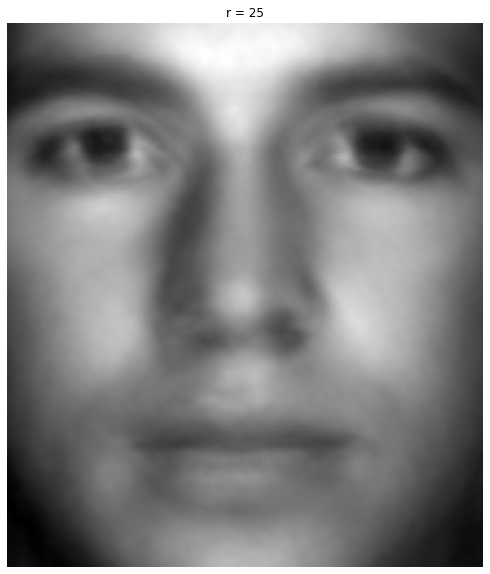

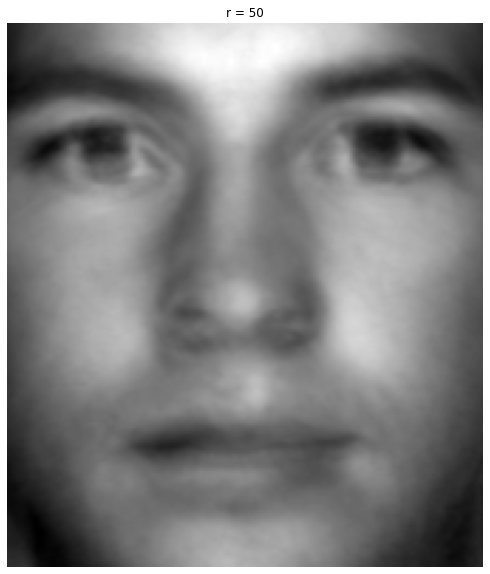

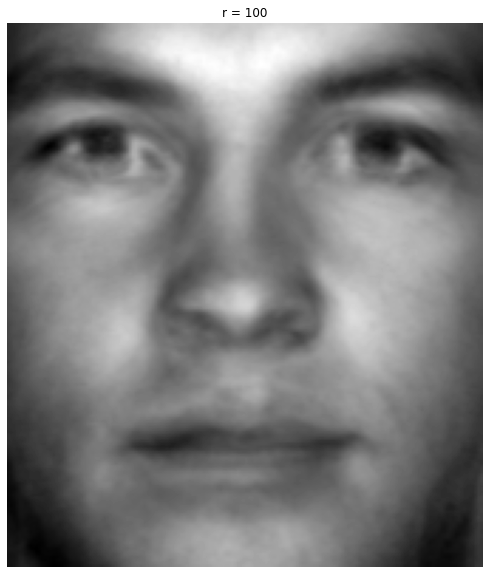

In [ ]:
# eigenface reconstruction of image omitted from test set
testFace = faces[:, np.sum(nfaces[:36])]
plt.imshow(np.reshape(testFace, (m, n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

testFaceMs = testFace - avgFace
r_list = [25, 50, 100, 200, 400, 800, 1600]

for r in r_list:
  reconFace = avgFace + U[:, :r] @ U[:, :r].T @ testFaceMs
  img = plt.imshow(np.reshape(reconFace, (m, n)).T)
  plt.title(f'r = {r}')
  plt.axis('off')
  plt.show()

In [ ]:
t